# PANDAS SERIES & DATAFRAMES

Este notebook cubre los fundamentos del manejo de datos en Python usando la biblioteca pandas. A lo largo de las secciones, aprenderás a crear, manipular y analizar datos de forma eficiente con Series y DataFrames.

*   Modulos
*   Crear una serie
*   Crear un dataframe
*   Carga de datos
*   Resumen y descriptivo de los datos: dimensiones y estructuras
*   Valores Ausentes: Detección y Tratamiento
*   Variables dummy
*   Ordenar un dataframe
*   filtrar por columna o fila
*   Consultas con .query()
*   Joins (Uniones entre tablas)



## Modulos

**¿Qué es un módulo?**

Un módulo (o biblioteca/paquete) en Python es un conjunto de funciones y herramientas que podemos reutilizar.

>   Previo a usar un modulo se debe primero *descargar*, *instalar* y luego si se puede *importar*

Si se recibe un error de este tipo *ModuleNotFoundError: No module named 'NOMBRE_MODULO_DESEADO'* se puede solucionar de la siguiente forma :

    * en CMD/TERMINAL usar el comando: pip install NOMBRE_MODULO_DESEADO
    * en la rutina se incluye la instrucción: !pip install NOMBRE_MODULO_DESEADO
    * especificar las librerias/modulos que se necesitan y la versión en un requirements.txt

In [1]:
import os # importar los modulos

In [2]:
import pandas as pd # traernos las funciones para importar y trabajar con tablas de datos
import numpy as np # traernos las funciones para trabajar con arreglos/matrices/vectores datos

## Crear una serie

Estructura unidimensional : Una Serie de pandas es una estructura unidimensional similar a un array de NumPy, pero con etiquetas (índices) en lugar de solo posiciones numéricas.

* creando una serie de pandas a partir de un diccionario

In [3]:
# crear un diccionario
s = {
    'Jairo': 1020159,
    'Felipe': 1020486,
    'Omar': 1020754
    }

# crear una serie de pandas usando el diccionario
ds_000 = pd.Series(s)

# ver serie de pandas
ds_000

,0
Jairo,1020159
Felipe,1020486
Omar,1020754


* creando una serie de pandas a partir de listas

In [4]:
valores = [1020159, 1020486, 1020754] # creamos un listado con la serie de informacion
list_indx = ['Jairo', 'Felipe', 'Omar'] # creamos un listado con los indices o nombres de las filas

ds_000 = pd.Series(
    valores,
    index = list_indx
    )# usamos la funcion pd.series para obtener una serie de pandas
ds_000

,0
Jairo,1020159
Felipe,1020486
Omar,1020754


* crear una serie de pandas con solo una lista de valores

In [5]:
s = ['Jairo', 'Felipe', 'Omar']
ds_000 = pd.Series(s) # crear una serie de pandas solo con una lista
ds_000 # ver serie de pandas

,0
0,Jairo
1,Felipe
2,Omar


## Crear un dataframe

Un DataFrame es una estructura bidimensional en pandas (como una hoja de cálculo de Excel), compuesta por filas y columnas, donde cada columna puede tener un tipo de dato diferente.

    * NOMBRE UNICO QUE IDENTIFIQUE CADA COLUMNA : no hay dos columnas con el mismo nombre
    * FORMATO : una misma columna no puede mas de un tipo de dato (o solamente numerica o solamente texto, o solamente otro tipo)

In [6]:
# crear un diccionario
dm_000 = {
    'Job Title': ['Android Developer', 'Full Stack Web Developer', 'Full Stack Web Developer'],
    'Salary': [3456, 6789,12345]
    }

# construir un dataframe a partir de un diccionario (las llaves las va a utilizar para generar columnas)
df_000 = pd.DataFrame(data=dm_000)
df_000

,Job Title,Salary
0,Android Developer,3456
1,Full Stack Web Developer,6789
2,Full Stack Web Developer,12345


In [7]:
# crear un dataframe desde una serie de pandas
s = [1020159, 1020486, 1020754,999999] # lista de informacion con el salario
list_indx = ['Jairo', 'Felipe', 'Omar','juan'] # lista con el trabajador
ds_000 = pd.Series(s,index = list_indx) # crear una serie de pandas con la lista de informacion y de indices


# crear un diccionario utilizando la serie de pandas generada anteriormente
dm_000 = {
    'Job Title': ['Android Developer', 'Full Stack Web Developer', 'Full Stack Web Developer','Unemployed'],
    'Salary': ds_000
    }

df_000 = pd.DataFrame(data=dm_000) # crear el datfarame a partir de la serie de pandas
df_000

,Job Title,Salary
Jairo,Android Developer,1020159
Felipe,Full Stack Web Developer,1020486
Omar,Full Stack Web Developer,1020754
juan,Unemployed,999999


In [8]:
# crear una matriz o arreglo de datos usando numpy
da_000 = np.array(
    [
        ['Jairo', 'Android Developer', 1020159],
        ['Felipe', 'Full Stack Web Developer', 1020486],
        ['Omar', 'Full Stack Web Developer', 1020754]
        ]
        )

# a partir de un array de numpy construyo el dataframe
df_000 = pd.DataFrame(
    data= da_000,
    columns= ['Name', 'Job Title', 'Salary']
    ) # usar el arrglo de numpy e indicar explicitamente el nopmbre las columnas

df_000


,Name,Job Title,Salary
0,Jairo,Android Developer,1020159
1,Felipe,Full Stack Web Developer,1020486
2,Omar,Full Stack Web Developer,1020754


* generar un dataframe vacío

In [9]:
df_000 = pd.DataFrame()
df_000

""


## Carga de datos

**Qué se necesita para leer/acceder a un recurso de información? ...**

1. Saber dónde está ubicado?
2. Saber cómo se llama el recurso de información?
3. Qué método/estrategia/función me sirve para leerlo?

### Carga de un archivo plano


Pandas permite leer diferentes tipos de archivos planos como CSV, TXT o TSV de forma rápida y sencilla.

In [10]:
# CONSTRUIR LA DIRECCION DE UBICACION UN RECURSO DE INFORMACION
mainpath = "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/" # direccion o ruta de ubicacion del archivo
filename = "Salary_Dataset_with_Extra_Features.csv" # el nombre del archivo y la extension
fullpath = os.path.join(mainpath, filename) # concatenar la direccion completa
fullpath

'https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features.csv'

> https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

    * pd.read_csv()

In [11]:
 # utilizar la funcion de lectura de "archivos planos" de pandas para leer archivo ubicado en la ruta
df_000 = pd.read_csv(fullpath) # lea archivo en ruta ( .txt , .csv y .tsv)
df_000 # muestreme que hay en la variable

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


* parametrizar la lectura del archivo

| Parámetro   | Descripción                                                    |
| ----------- | -------------------------------------------------------------- |
| `sep`       | Separador de columnas (por defecto es `,`)                     |
| `header`    | Fila que contiene los nombres de columnas                      |
| `names`     | Lista de nombres de columnas si no hay encabezado              |
| `encoding`  | Codificación del archivo (por ejemplo, `'utf-8'`, `'latin-1'`) |
| `index_col` | Indica qué columna usar como índice                            |
| `usecols`   | Cargar solo ciertas columnas                                   |


In [16]:
df_001 = pd.read_csv(fullpath, sep=",") # seperador de columnas
df_001

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [17]:
df_001 = pd.read_csv(
    fullpath, # ruta
    sep=",", # separador
    header = 'infer' # lectura del encabezado
    ) # parametrizar la lectura del archivo
df_001

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [18]:
list_colnames = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H'] # creo un listado ( de nombres de columnas)

df_002 = pd.read_csv(
    fullpath, # ruta
    sep=",", # separador
    names = list_colnames # el listado de nombres de columnas
    ) # leer el archivo indicando el nombre de las columnas

df_002

,A,B,C,D,E,F,G,H
0,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
3,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
4,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22766,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22767,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22768,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22769,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [19]:
list_colnames = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H'] # creo un listado ( de nombres de columnas)

df_003 = pd.read_csv(
    fullpath,
    sep=",",
    names = list_colnames,

    skiprows = 1 # salte la la primer fila en la lectura
    )
df_003

,A,B,C,D,E,F,G,H
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


### Carga de un archivo de excel

Además de archivos planos, pandas permite cargar archivos de Excel (.xls o .xlsx) de forma sencilla usando la función read_excel().

    * pd.read_excel

*NOTA* :  se debe tener instaldo el modulo --openpyxl-- para archivos .xlsx,  --xlrd-- para archivos .xls

In [20]:
# construir ruta de ubicacion del archivo
mainpath = "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/"
filename = "Salary_Dataset_with_Extra_Features.xlsx"
fullpath = os.path.join(mainpath, filename)
fullpath

'https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features.xlsx'

In [21]:
df_004 = pd.read_excel(fullpath) # usar la funcion de lectura de excel para pandas
df_004

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


| Parámetro    | Descripción                                        |
| ------------ | -------------------------------------------------- |
| `sheet_name` | Nombre o número de la hoja a leer (por defecto: 0) |
| `header`     | Número de fila que contiene los nombres de columna |
| `names`      | Lista de nombres de columna personalizados         |
| `usecols`    | Lista o rango de columnas a leer                   |
| `skiprows`   | Número de filas a omitir desde el principio        |


In [22]:
# para una descripcion rapida del dataframe
df_004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [23]:
df_004 = pd.read_excel(
    fullpath,
    sheet_name = 0 # seleccionar una hojas del excel
    ) # usar la funcion de lectura de excel para pandas
df_004

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [24]:
df_004 = pd.read_excel(
    fullpath,
    sheet_name = 'Salary_Dataset_with_Extra_Featu' # seleccionar una hojas del excel
    ) # usar la funcion de lectura de excel para pandas
df_004

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


## Carga masiva de archivos

* **OPCION A** : Cuando tenemos múltiples archivos (por ejemplo, varias hojas de cálculo con la misma estructura), podemos automatizar su lectura usando un bucle y almacenar los resultados en una lista de DataFrames.

In [25]:
# lista de adirecciones donde estan ubicados cada uno de los archivo
list_filename = [
    "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features_pt1.xlsx",
    "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features_pt2.xlsx",
    "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features_pt3.xlsx"
    ]

# crear una lista vacia contenedora
list_df = []

#estructura de control for
for file_i in list_filename:
  list_df.append(pd.read_excel(file_i)) # la lista vacia se va a llenar de cada uno de los dataframes que va a leer

list_df # ver contenido de la lista

[      Rating                      Company Name          Job Title   Salary  \
 0        3.8                            Sasken  Android Developer   400000   
 1        4.5  Advanced Millennium Technologies  Android Developer   400000   
 2        4.0                         Unacademy  Android Developer  1000000   
 3        3.8                SnapBizz Cloudtech  Android Developer   300000   
 4        4.4            Appoids Tech Solutions  Android Developer   600000   
 ...      ...                               ...                ...      ...   
 3408     4.0                  Fresherworld.com    Backend Process   180000   
 3409     3.8                       NCC Limited    Backend Process   300000   
 3410     4.5                             Groww    Backend Process   120000   
 3411     4.0                              Vogo    Backend Process   216000   
 3412     3.6                              FHPL    Backend Process   200000   
 
       Salaries Reported   Location Employment Sta

![picture](https://raw.githubusercontent.com/elprincipitogauss/lesson/main/bindrows.png)

In [26]:
# canaatidad de filas de cada dataframe
3413+10030+6246

19689

* **OPCION B** : Cuando deseamos combinar varios archivos Excel que tienen la misma estructura, podemos usar pandas.concat() para unirlos verticalmente (uno debajo del otro).

    * pd.concat

In [28]:
# enlistamos las direcciones a consultar con los exceles
list_filename = [
    "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features_pt1.xlsx",
    "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features_pt2.xlsx",
    "https://raw.githubusercontent.com/anguihero/Data_BI_AA_AI_Lessons/refs/heads/main/data/Salary_Dataset_with_Extra_Features/Salary_Dataset_with_Extra_Features_pt3.xlsx"
    ]

# nota : no se necesita generar dataframe contenedor vacio

# recorrer la lista para leer cada uno de los exceles
for file_i in list_filename:

  df_a = pd.read_excel(file_i) # generar un dataframe leyendo la direccion en el iterando

  try: # intente realizar ...
    df_cont = pd.concat([df_cont,df_a]) # pegar por abajo la nueva base leida a la base inicial
  except:
    df_cont = df_a # el datframe leido va a ser el datframe inicial del contenedor

df_cont

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
6241,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
6242,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
6243,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
6244,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


* listar archivos de un directorio

In [29]:
def busqueda_directorio_archivos(directorio,patron):
    """
    directorio: es la ruta del directorio que se quiere explorar
    patron: el patron que debe coincidir con el nombre en la busqueda de los archivos
    """
    archivos = os.listdir(directorio)
    resultado = list(filter(lambda x: patron in x, archivos))
    return resultado


In [33]:
busqueda_directorio_archivos(directorio = '.',patron = 'california')

['california_housing_train.csv', 'california_housing_test.csv']

## Resumen de los datos: dimensiones y estructuras

Una vez cargado un DataFrame, es fundamental entender su estructura general, sus dimensiones, y los primeros y últimos registros.

* Copia de respaldo (backup) del DataFrame : Antes de hacer transformaciones, se recomienda guardar una copia:

In [34]:
# backup de la información
df = df_000.copy() # reserva una copia de la informacion en la memoria
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


* Vista preliminar de los datos

In [36]:
df.head(3) #  encabezado del dataframe

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android


In [37]:
df.tail(5) # la cola de la tabla

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web
22769,3.8,Thomson Reuters,Associate Web Developer,300000,7,Bangalore,Full Time,Web


In [38]:
df.columns # el nombre de las columnas de la tabla

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles'],
      dtype='object')

In [41]:
df.shape # las dimensiones del dataframe (rows, columns)

(22770, 8)

In [42]:
# resumen estdistico de cada columna
# segun de el tipo de datos realizar un descriptivo rapido
# da prioridad a las columnas numericas
df.describe()

,Rating,Salary,Salaries Reported
count,22769.000000,2.277000e+04,22770.000000
mean,3.918209,6.953872e+05,1.855775
std,0.519686,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


* Nota : seleccionar columnas de un dataframe usando las llavesdataframe
[[columna_1, columna_2,..., columna_n]]

In [43]:
df['Company Name'] # seleccionar una sola columna / con la variable texto con el nombre de la columna

,Company Name
0,Sasken
1,Advanced Millennium Technologies
2,Unacademy
3,SnapBizz Cloudtech
4,Appoids Tech Solutions
...,...
22765,Expert Solutions
22766,Nextgen Innovation Labs
22767,Fresher
22768,Accenture


In [45]:
df[['Company Name', 'Job Title']] # seleccionar varias columnas / con la lista de nombres(variable texto) de las columnas

,Company Name,Job Title
0,Sasken,Android Developer
1,Advanced Millennium Technologies,Android Developer
2,Unacademy,Android Developer
3,SnapBizz Cloudtech,Android Developer
4,Appoids Tech Solutions,Android Developer
...,...,...
22765,Expert Solutions,Web Developer
22766,Nextgen Innovation Labs,Web Developer
22767,Fresher,Full Stack Web Developer
22768,Accenture,Full Stack Web Developer


In [46]:
# resumen estdistico de cada columna
# segun de el tipo de datos realizar un descriptivo rapido
# da prioridad a las columnas numericas se debe filtrar solo texto eenn caso de describir cols texto
df[['Company Name', 'Job Title']].describe()

,Company Name,Job Title
count,22768,22770
unique,11259,1080
top,Tata Consultancy Services,Software Development Engineer
freq,271,2351


In [47]:
df.dtypes # tipo de datos en cada columna

,0
Rating,float64
Company Name,object
Job Title,object
Salary,int64
Salaries Reported,int64
Location,object
Employment Status,object
Job Roles,object


In [48]:
df.info() # resumen rapido de la informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22769 non-null  float64
 1   Company Name       22768 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


## Tratamiento y detección de valores ausentes

In [49]:
# variable que se le asigna un texto que es el nombre de una columna #feature=atributos=variables=columnas
ftr_name = "Rating"

In [50]:
# ver columna seleccionada
df[ftr_name]

,Rating
0,3.8
1,4.5
2,4.0
3,3.8
4,4.4
...,...
22765,4.7
22766,4.0
22767,4.1
22768,4.1


In [51]:
# si la informacion de cada elemento de la columna es nula
pd.isnull(df[ftr_name])

,Rating
0,False
1,False
2,False
3,False
4,False
...,...
22765,False
22766,False
22767,False
22768,False


In [52]:
# si la informacion de cada elemento de la columna no es nula
pd.notnull(df[ftr_name])

,Rating
0,True
1,True
2,True
3,True
4,True
...,...
22765,True
22766,True
22767,True
22768,True


In [53]:
# cuantos vacios hay?
cuantos_vacios = pd.isnull(df[ftr_name]).values.ravel().sum() # sumar los trues (cuando es vacio)
print('La columna '+ftr_name+ ' posee {} registros vacíos'.format(cuantos_vacios))

La columna Rating posee 1 registros vacíos


In [54]:
# cuantos no son vacios?
cuantos_llenos = pd.notnull(df[ftr_name]).values.ravel().sum() # suma los trues (cuando no es vacio)
print('La columna '+ftr_name+ ' posee {} registros con información'.format(cuantos_llenos))

La columna Rating posee 22769 registros con información


### Borrar valores ausentes

filtrar dataframe por condicion, cuando es verdadero deja la fila

> dataframe[--condicion a cumplir para filtrar--]

In [55]:
# filtrar el dataframe según el registro que posee vacios en la columna
df[pd.isnull(df[ftr_name])]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
18,NaN,J.P. Morgan,Android Developer,1000000,2,Bangalore,Full Time,Android


In [56]:
# recorrer el dataframe usando los numeros de filas
# otr form  de usar rangos usando : limite_inferior:limite_superior
# nnunca lleg al limite_superior
# iloc loclizr por index
df.iloc[16:21]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
16,3.6,Novopay Solutions,Android Developer,600000,2,Bangalore,Full Time,Android
17,3.7,WealthEngine,Android Developer,360000,2,Bangalore,Full Time,Android
18,NaN,J.P. Morgan,Android Developer,1000000,2,Bangalore,Full Time,Android
19,3.6,Acviss,Android Developer,500000,2,Bangalore,Full Time,Android
20,4.1,Fresher,Android Developer,408000,2,Bangalore,Full Time,Android


* revisión y borrado por eje filas

In [57]:
# borrar filas que contengan todos los campos vacios
df.dropna(
    axis=0,  # cuando axis = 0 hace referencia a las filas
    how="all" # todos los campos vacios
    ).iloc[16:21]


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
16,3.6,Novopay Solutions,Android Developer,600000,2,Bangalore,Full Time,Android
17,3.7,WealthEngine,Android Developer,360000,2,Bangalore,Full Time,Android
18,NaN,J.P. Morgan,Android Developer,1000000,2,Bangalore,Full Time,Android
19,3.6,Acviss,Android Developer,500000,2,Bangalore,Full Time,Android
20,4.1,Fresher,Android Developer,408000,2,Bangalore,Full Time,Android


In [58]:
# borrar filas que contengan por lo menos un campo
df.dropna(
    axis=0, # cuando axis = 0 hace referencia a las filas
    how="any" # por lo menos algun campo esté vacio
    ).iloc[16:21]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
16,3.6,Novopay Solutions,Android Developer,600000,2,Bangalore,Full Time,Android
17,3.7,WealthEngine,Android Developer,360000,2,Bangalore,Full Time,Android
19,3.6,Acviss,Android Developer,500000,2,Bangalore,Full Time,Android
20,4.1,Fresher,Android Developer,408000,2,Bangalore,Full Time,Android
21,4.2,MedOnGo,Android Developer,300000,2,Bangalore,Full Time,Android


* revisión y borrado por eje columnas

In [59]:
# borrar columnas que contengan todos los registros vacios
df.dropna(
    axis=1, # cuando axis = 1 el entiendo que va a realizarlo por columnas
    how="all"
    ).iloc[16:21]


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
16,3.6,Novopay Solutions,Android Developer,600000,2,Bangalore,Full Time,Android
17,3.7,WealthEngine,Android Developer,360000,2,Bangalore,Full Time,Android
18,NaN,J.P. Morgan,Android Developer,1000000,2,Bangalore,Full Time,Android
19,3.6,Acviss,Android Developer,500000,2,Bangalore,Full Time,Android
20,4.1,Fresher,Android Developer,408000,2,Bangalore,Full Time,Android


In [60]:
# borrar columnas que contengan por lo menos un campo
df.dropna(
    axis=1, # cuando axis = 1 el entiendo que va a realizarlo por columnas
    how="any"
    ).iloc[16:21]


,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
16,Android Developer,600000,2,Bangalore,Full Time,Android
17,Android Developer,360000,2,Bangalore,Full Time,Android
18,Android Developer,1000000,2,Bangalore,Full Time,Android
19,Android Developer,500000,2,Bangalore,Full Time,Android
20,Android Developer,408000,2,Bangalore,Full Time,Android


### imputar valores ausentes

In [61]:
df_imputed = df.copy() # copy realiza una copia en otra variable

In [62]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22769 non-null  float64
 1   Company Name       22768 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [63]:
# llene todos los vacios (NaN NA Null) con "ceros" numerico
df_test_000 = df_imputed.fillna(0)
print(df_test_000.iloc[16:21] )
df_test_000.info()

    Rating       Company Name          Job Title   Salary  Salaries Reported  \
16     3.6  Novopay Solutions  Android Developer   600000                  2   
17     3.7       WealthEngine  Android Developer   360000                  2   
18     0.0        J.P. Morgan  Android Developer  1000000                  2   
19     3.6             Acviss  Android Developer   500000                  2   
20     4.1            Fresher  Android Developer   408000                  2   

     Location Employment Status Job Roles  
16  Bangalore         Full Time   Android  
17  Bangalore         Full Time   Android  
18  Bangalore         Full Time   Android  
19  Bangalore         Full Time   Android  
20  Bangalore         Full Time   Android  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1 

In [64]:
df_test_000 = df_imputed.fillna('0')
print(df_test_000.iloc[16:21] )
df_test_000.info() # llene todos los vacios con "ceros" en texto

   Rating       Company Name          Job Title   Salary  Salaries Reported  \
16    3.6  Novopay Solutions  Android Developer   600000                  2   
17    3.7       WealthEngine  Android Developer   360000                  2   
18      0        J.P. Morgan  Android Developer  1000000                  2   
19    3.6             Acviss  Android Developer   500000                  2   
20    4.1            Fresher  Android Developer   408000                  2   

     Location Employment Status Job Roles  
16  Bangalore         Full Time   Android  
17  Bangalore         Full Time   Android  
18  Bangalore         Full Time   Android  
19  Bangalore         Full Time   Android  
20  Bangalore         Full Time   Android  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             22770 non-null  object
 1   Company

In [ ]:
# #dos formas de guardar el resultado del cambio
# df_imputed.fillna('0',inplace=True)
# df_imputed = df_imputed.fillna('0')

* realizar la imputacion según el contexto

In [65]:
# seleccionar columna quie se quiere afectar (imputar)
ftr_name = 'Rating'

# saca el promedio de la columna seleccionada
promedio = df_imputed[ftr_name].mean()
# saca el promedio de la columna seleccionada
mediana = df_imputed[ftr_name].median()

print('el promedio de la columna {} es {} y su mediana es {}'.format(ftr_name,str(promedio),str(mediana)))

el promedio de la columna Rating es 3.9182089683341386 y su mediana es 3.9


In [66]:
# recorrer el dataframe usando los numeros de filas
df.iloc[16:21]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
16,3.6,Novopay Solutions,Android Developer,600000,2,Bangalore,Full Time,Android
17,3.7,WealthEngine,Android Developer,360000,2,Bangalore,Full Time,Android
18,NaN,J.P. Morgan,Android Developer,1000000,2,Bangalore,Full Time,Android
19,3.6,Acviss,Android Developer,500000,2,Bangalore,Full Time,Android
20,4.1,Fresher,Android Developer,408000,2,Bangalore,Full Time,Android


In [67]:
#los diferentes metodos de rellenar o imputacion

# seleccionar la columna
ftr_name = 'Rating'

# rellenar con un valor dado
df_imputed["X_0_numerico"] = df_imputed[ftr_name].fillna(0) # imputar con un numero para todos los ausentes
df_imputed["X_0_texto"] = df_imputed[ftr_name].fillna('0')# imputar con un texto para todos los ausentes

# relleno segun contexto
df_imputed["X_promedio"] = df_imputed[ftr_name].fillna(df_imputed[ftr_name].mean())# imputar con un numero resultado de obtewner el promedio de la columna para todos los ausentes
df_imputed["X_mediana"] = df_imputed[ftr_name].fillna(df_imputed[ftr_name].median())# imputar con un numero resultado de obtewner la mediano de la columna para todos los ausentes
df_imputed["X_forward"] = df_imputed[ftr_name].fillna(method="ffill") # imputar con el anterior valor en la columna para todos los ausentes
df_imputed["X_backward"] = df_imputed[ftr_name].fillna(method="backfill")# imputar con el posterior valor en la columna para todos los ausentes

# ver resultado de las estrategias de imputacion
columnas_resultado = [ftr_name,"X_0_numerico","X_0_texto","X_promedio","X_mediana","X_forward","X_backward"]
df_imputed[columnas_resultado][16:21]

/tmp/ipython-input-67-3296314481.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed["X_forward"] = df_imputed[ftr_name].fillna(method="ffill") # imputar con el anterior valor en la columna para todos los ausentes
/tmp/ipython-input-67-3296314481.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed["X_backward"] = df_imputed[ftr_name].fillna(method="backfill")# imputar con el posterior valor en la columna para todos los ausentes


,Rating,X_0_numerico,X_0_texto,X_promedio,X_mediana,X_forward,X_backward
16,3.6,3.6,3.6,3.600000,3.6,3.6,3.6
17,3.7,3.7,3.7,3.700000,3.7,3.7,3.7
18,NaN,0.0,0,3.918209,3.9,3.7,3.6
19,3.6,3.6,3.6,3.600000,3.6,3.6,3.6
20,4.1,4.1,4.1,4.100000,4.1,4.1,4.1


In [68]:
nombre_columna = "Company Name"
df_imputed[df_imputed[nombre_columna].isnull()] # el registro vacio

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,X_0_numerico,X_0_texto,X_promedio,X_mediana,X_forward,X_backward
69,4.0,NaN,Android Developer,264000,2,Bangalore,Full Time,Android,4.0,4.0,4.0,4.0,4.0,4.0
13760,4.0,NaN,Software Development Engineer,1188000,1,Bangalore,Full Time,SDE,4.0,4.0,4.0,4.0,4.0,4.0


In [69]:
df_imputed.iloc[67:72] # fila 69 es la que posee un valor vacio

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,X_0_numerico,X_0_texto,X_promedio,X_mediana,X_forward,X_backward
67,3.9,HARMAN,Android Developer,700000,2,Bangalore,Full Time,Android,3.9,3.9,3.9,3.9,3.9,3.9
68,3.2,Oust Labs,Android Developer,396000,2,Bangalore,Full Time,Android,3.2,3.2,3.2,3.2,3.2,3.2
69,4.0,NaN,Android Developer,264000,2,Bangalore,Full Time,Android,4.0,4.0,4.0,4.0,4.0,4.0
70,3.6,TruKKer Technologies,Android Developer,500000,2,Bangalore,Full Time,Android,3.6,3.6,3.6,3.6,3.6,3.6
71,3.3,Datamatics Global Services,Android Developer,1000000,2,Bangalore,Full Time,Android,3.3,3.3,3.3,3.3,3.3,3.3


In [70]:
#los diferentes metodos de rellenar o imputacion
nombre_columna = "Company Name"

# rellenar con un valor dado
df_imputed["X_0_numerico"] = df_imputed[nombre_columna].fillna(0) # imputar con un numero para todos los ausentes
df_imputed["X_cualquier_texto"] = df_imputed[nombre_columna].fillna('Alcaldia')# imputar con un texto para todos los ausentes

# relleno segun contexto
df_imputed["X_forward"] = df_imputed[nombre_columna].fillna(method="ffill") # imputar con el anterior valor en la columna para todos los ausentes
df_imputed["X_backward"] = df_imputed[nombre_columna].fillna(method="backfill")# imputar con el posterior valor en la columna para todos los ausentes

# ver resultado de las estrategias de imputacion
columnas_resultado = [nombre_columna,"X_0_numerico","X_cualquier_texto","X_forward","X_backward"]
df_imputed[columnas_resultado][67:72]

/tmp/ipython-input-70-3135418756.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed["X_forward"] = df_imputed[nombre_columna].fillna(method="ffill") # imputar con el anterior valor en la columna para todos los ausentes
/tmp/ipython-input-70-3135418756.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed["X_backward"] = df_imputed[nombre_columna].fillna(method="backfill")# imputar con el posterior valor en la columna para todos los ausentes


,Company Name,X_0_numerico,X_cualquier_texto,X_forward,X_backward
67,HARMAN,HARMAN,HARMAN,HARMAN,HARMAN
68,Oust Labs,Oust Labs,Oust Labs,Oust Labs,Oust Labs
69,NaN,0,Alcaldia,Oust Labs,TruKKer Technologies
70,TruKKer Technologies,TruKKer Technologies,TruKKer Technologies,TruKKer Technologies,TruKKer Technologies
71,Datamatics Global Services,Datamatics Global Services,Datamatics Global Services,Datamatics Global Services,Datamatics Global Services


## Variables dummy

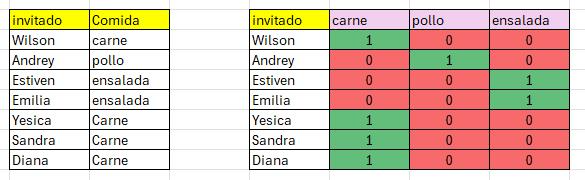

In [71]:
df_dummies = df.copy() # sacando una copia del df original

In [72]:
df_dummies["Employment Status"].values # reviisar posibles valores que puede haber en columna seleccionada

array(['Full Time', 'Full Time', 'Full Time', ..., 'Full Time',
       'Full Time', 'Full Time'], dtype=object)

In [73]:
df_dummies["Employment Status"].value_counts()# reviisar posibles valores que puede haber en columna seleccionada

,count
Employment Status,
Full Time,20083
Intern,2106
Contractor,548
Trainee,33


In [74]:
vars_dummies = pd.get_dummies(
    df_dummies["Employment Status"], # la columna original
    prefix="Empl_status:" # agrega un prefijo al nuevo nombre de la columna
    ) # obtener las columnas dummies a pártir de columna referencia
vars_dummies

,Empl_status:_Contractor,Empl_status:_Full Time,Empl_status:_Intern,Empl_status:_Trainee
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
22765,False,True,False,False
22766,False,True,False,False
22767,False,True,False,False
22768,False,True,False,False


In [75]:
# 1er paso - convertir en dummies columna categorica (entrega tantas columnas como categorias tenga la columna original)
vars_dummies = pd.get_dummies(
    df_dummies["Employment Status"],
    prefix="Empl_status:"
    ) # obtener las columnas dummies a pártir de columna referencia

# 2do paso - borrar columna original que se convirtió a dummies
df_drop_var = df_dummies.drop(
    ["Employment Status"],
    axis = 1 # eliminar columnas
    ) # construir las dummies apartir del status

# 3er paso -  concatenar (pegar columnas a la derecha) el df con columnas dummies
df_dummies = pd.concat(
    [df_drop_var, vars_dummies],
    axis = 1 # pegar por la derecha la tabla construida de dummies (pegar por columna)
    )

# revisar encabezado con reusltado
df_dummies.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Job Roles,Empl_status:_Contractor,Empl_status:_Full Time,Empl_status:_Intern,Empl_status:_Trainee
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Android,False,True,False,False
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Android,False,True,False,False
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Android,False,True,False,False
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Android,False,True,False,False
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Android,False,True,False,False


## Ordenar el dataframe

In [76]:
df.head(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [77]:
# ordenemelo utilizando la columna de formma ascendente
df.sort_values(
    by=['Rating'], # segun la informacion de la colum
    ascending=True # de forma ascendente (de menor a mayor)
    )

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
42,1.0,Pricyfy,Android Developer,216000,2,Bangalore,Full Time,Android
17968,1.0,Dangal Games,Software Development Engineer I,500000,2,New Delhi,Full Time,SDE
8717,1.0,Vivant (India),Junior IOS Developer,400000,1,Pune,Full Time,IOS
2594,1.0,Tsysinfo Technologies,Android Developer,132000,2,Pune,Full Time,Android
2443,1.0,Codoc,Android Developer,1000000,1,New Delhi,Full Time,Android
...,...,...,...,...,...,...,...,...
22742,5.0,Leanpitch,Web Developer,500000,1,Bangalore,Full Time,Web
30,5.0,powerplay app,Android Developer - Intern,396000,2,Bangalore,Intern,Android
63,5.0,powerplay app,Android Developer,1000000,2,Bangalore,Full Time,Android
84,5.0,Proven Solution,Android Developer,500000,1,Bangalore,Full Time,Android


In [78]:
# ordenemelo utilizando la columna de formma ascendente
df.sort_values(
    by=['Rating'], # segun la informacion de la column
    ascending=False # de forma descendente (de mayor a menor)
    )

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
22742,5.0,Leanpitch,Web Developer,500000,1,Bangalore,Full Time,Web
6322,5.0,Jobs Vibhaga,Front End Developer,264000,1,Hyderabad,Full Time,Frontend
6323,5.0,True Wave,Front End Developer,500000,1,Hyderabad,Full Time,Frontend
6330,5.0,cygengroup,Front End Developer,300000,1,Hyderabad,Full Time,Frontend
6331,5.0,Jellyglass,Front End Developer,204000,1,Hyderabad,Full Time,Frontend
...,...,...,...,...,...,...,...,...
42,1.0,Pricyfy,Android Developer,216000,2,Bangalore,Full Time,Android
6328,1.0,SAMA Telecom,Front End Developer,100000,1,Hyderabad,Full Time,Frontend
1817,1.0,Anaadih Softech,Android Developer,384000,1,New Delhi,Full Time,Android
1804,1.0,NSP Security,Android Developer,228000,1,New Delhi,Full Time,Android


In [79]:
df.sort_values(
    by=['Location']
    ) # ascendente (de menor a mayor o de A a la Z) : ascending=True
# cuando hay vacios los suele dejar al final

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
12149,4.0,JPMorgan Chase & Co,Software Development Engineer,1200000,1,Bangalore,Full Time,SDE
12150,4.0,Hdref,Software Development Engineer,1200000,1,Bangalore,Full Time,SDE
12151,4.0,SAP Ariba,Software Development Engineer,1200000,1,Bangalore,Full Time,SDE
12152,3.4,Joy Global,Software Development Engineer,1200000,1,Bangalore,Full Time,SDE
...,...,...,...,...,...,...,...,...
19681,4.0,Barclays,Software Development Engineer (SDE) II,1300000,1,Pune,Full Time,SDE
19682,3.9,AArete,Software Development Engineer (SDE) II,200000,1,Pune,Full Time,SDE
19683,4.1,Xoriant,Software Development Engineer (SDE) II,1700000,1,Pune,Full Time,SDE
19613,3.9,Mercedes-Benz International,Software Development Engineer In Test (SDET),5000000,1,Pune,Full Time,SDE


In [80]:
df.sort_values(
    by=['Location'],
    ascending=False # descendente (de mayor a menor o de Z a la A) : ascending=False
    )
# cuando hay vacios los suele dejar al final

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
7057,4.0,GeekSquad,Front End Developer,500000,1,Pune,Full Time,Frontend
2870,3.8,Megapolis Pune,Android Developer,156000,1,Pune,Full Time,Android
2877,4.1,Android de México,Android Developer,228000,1,Pune,Full Time,Android
2876,3.0,Intuition IT Solutions,Android Developer,200000,1,Pune,Full Time,Android
2875,2.2,LogicBits,Android Developer,168000,1,Pune,Full Time,Android
...,...,...,...,...,...,...,...,...
11241,4.0,Focus Softek,Python/Django Developer,500000,1,Bangalore,Full Time,Python
11242,3.5,Byte Academy,Python/Django Developer,200000,1,Bangalore,Full Time,Python
11243,5.0,Tudo Technologoies,Python/Django Developer,288000,1,Bangalore,Full Time,Python
11244,3.2,IAS,Python/Django Developer,1152000,1,Bangalore,Full Time,Python


In [81]:
# ordenar por varias columnas
df.sort_values(
    by=['Rating','Location','Salary','Salaries Reported'],
    ascending=False # desc
    )

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
19713,5.0,doLoop Technologies,Principal Software Development Engineer,2100000,1,Pune,Full Time,SDE
18915,5.0,On Campus,Software Development Engineer,1700000,1,Pune,Full Time,SDE
6872,5.0,Talent Zone Consultants,Front End Developer,1500000,1,Pune,Full Time,Frontend
6994,5.0,ThoughtMiracles,Front End Developer,1500000,1,Pune,Full Time,Frontend
3703,5.0,Scalent Infotech,Backend Engineer,1000000,1,Pune,Full Time,Backend
...,...,...,...,...,...,...,...,...
21927,1.0,Corpyogi System,Web Developer,108000,1,Bangalore,Full Time,Web
4596,1.0,InnoCirc Ventures,Database Administrator (Database Administrator),100000,1,Bangalore,Full Time,Database
21832,1.0,Syflani Technologies,Web Developer,72000,2,Bangalore,Full Time,Web
5578,1.0,Numa Soft,Front-End Developer - Intern,36000,1,Bangalore,Intern,Frontend


In [82]:
# prueba
df.sort_values(
    by=['Rating','Location','Salary','Salaries Reported'],
    ascending=False
    )[df.Rating == 1.0][0:15] # ordenar por varias columnas

/tmp/ipython-input-82-4151213170.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values(


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
19217,1.0,ZEVEX,Software Development Engineer I,1100000,1,Pune,Full Time,SDE
8770,1.0,Hidoc Dr,Ios App Developer,612000,1,Pune,Full Time,IOS
8609,1.0,Vivant (India),IOS Developer,400000,1,Pune,Full Time,IOS
8717,1.0,Vivant (India),Junior IOS Developer,400000,1,Pune,Full Time,IOS
2823,1.0,TellMe,Android Developer Contractor,144000,1,Pune,Contractor,Android
2594,1.0,Tsysinfo Technologies,Android Developer,132000,2,Pune,Full Time,Android
7998,1.0,VRN Systems,IOS Developer,1100000,1,New Delhi,Full Time,IOS
2443,1.0,Codoc,Android Developer,1000000,1,New Delhi,Full Time,Android
6805,1.0,Wishbox Communications,Front End Developer,800000,1,New Delhi,Full Time,Frontend
17968,1.0,Dangal Games,Software Development Engineer I,500000,2,New Delhi,Full Time,SDE


## Filtrar por columna o fila

### filtrar por columnas (axis 1)

In [83]:
df.filter(
    items=['Rating', 'Salary'],
    axis=1 # filtrar usando el axis 1 indica que los items filtrados columnas
    )

,Rating,Salary
0,3.8,400000
1,4.5,400000
2,4.0,1000000
3,3.8,300000
4,4.4,600000
...,...,...
22765,4.7,200000
22766,4.0,300000
22767,4.1,192000
22768,4.1,300000


In [84]:
df.filter(
    like='Job',
    axis=1
    ) # seleccion columnas segun coincida con un patron

,Job Title,Job Roles
0,Android Developer,Android
1,Android Developer,Android
2,Android Developer,Android
3,Android Developer,Android
4,Android Developer,Android
...,...,...
22765,Web Developer,Web
22766,Web Developer,Web
22767,Full Stack Web Developer,Web
22768,Full Stack Web Developer,Web


In [85]:
df.filter(
    like='e',
    axis=1
    ) # seleccion columnas segun coincida con un patron

,Company Name,Job Title,Salaries Reported,Employment Status,Job Roles
0,Sasken,Android Developer,3,Full Time,Android
1,Advanced Millennium Technologies,Android Developer,3,Full Time,Android
2,Unacademy,Android Developer,3,Full Time,Android
3,SnapBizz Cloudtech,Android Developer,3,Full Time,Android
4,Appoids Tech Solutions,Android Developer,3,Full Time,Android
...,...,...,...,...,...
22765,Expert Solutions,Web Developer,1,Full Time,Web
22766,Nextgen Innovation Labs,Web Developer,1,Full Time,Web
22767,Fresher,Full Stack Web Developer,13,Full Time,Web
22768,Accenture,Full Stack Web Developer,7,Full Time,Web


In [86]:
df.filter(
    regex='e$', # las que terminen en 'e'
    axis=1
    ) # seleccionar las que coincidancon un patron utilzando expresiones regulares


,Company Name,Job Title
0,Sasken,Android Developer
1,Advanced Millennium Technologies,Android Developer
2,Unacademy,Android Developer
3,SnapBizz Cloudtech,Android Developer
4,Appoids Tech Solutions,Android Developer
...,...,...
22765,Expert Solutions,Web Developer
22766,Nextgen Innovation Labs,Web Developer
22767,Fresher,Full Stack Web Developer
22768,Accenture,Full Stack Web Developer


### filtrar por fila (index) (axis = 0)

In [87]:
df.filter(
    items=[227,267],
    axis=0
    )#  filtrar por fila utilizando el axis 0

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
227,5.0,Talent Zone Consultants,Android Developer,400000,1,Bangalore,Full Time,Android
267,3.4,News Corp,Android Developer,1600000,1,Bangalore,Full Time,Android


In [88]:
df.filter(
    like='227',
    axis=0
    ) #  filtrar por fila utilizando el axis 0 que coincidan en el nombre del indice

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
227,5.0,Talent Zone Consultants,Android Developer,400000,1,Bangalore,Full Time,Android
1227,4.3,Full Creative,Android - Intern,180000,1,Chennai,Intern,Android
2227,3.1,Samsung R&D Institute India - Bangalore,Android Developer,1000000,1,New Delhi,Full Time,Android
2270,3.9,IIFL,Android Developer,600000,1,New Delhi,Full Time,Android
2271,3.8,Associates for Bilingual Child Development,Android Developer,288000,1,New Delhi,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [89]:
df.filter(
    regex = '227$',
    axis = 0
    ) # todas las que el indice termine en 227

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
227,5.0,Talent Zone Consultants,Android Developer,400000,1,Bangalore,Full Time,Android
1227,4.3,Full Creative,Android - Intern,180000,1,Chennai,Intern,Android
2227,3.1,Samsung R&D Institute India - Bangalore,Android Developer,1000000,1,New Delhi,Full Time,Android
3227,4.2,HackerEarth,"Software Engineer, Backend - Intern",468000,1,Bangalore,Intern,Backend
4227,4.0,J.P. Morgan,Sybase Database Administrator,1900000,2,Bangalore,Full Time,Database
5227,3.2,Reward360,Front End Developer,600000,1,Bangalore,Full Time,Frontend
6227,3.6,Helical IT Solutions,Front End Developer,252000,1,Hyderabad,Full Time,Frontend
7227,4.6,Kristal.AI,IOS Developer,1500000,1,Bangalore,Full Time,IOS
8227,3.9,QuyTech,Senior IOS Developer,984000,1,New Delhi,Full Time,IOS
9227,4.0,Intellect Design Arena,Senior Java Developer,500000,1,Chennai,Full Time,Java


## Query con pandas (Consulta)

* seleccionar columnas

In [90]:
df['Salary']

,Salary
0,400000
1,400000
2,1000000
3,300000
4,600000
...,...
22765,200000
22766,300000
22767,192000
22768,300000


In [91]:
df.Salary

,Salary
0,400000
1,400000
2,1000000
3,300000
4,600000
...,...
22765,200000
22766,300000
22767,192000
22768,300000


1ra forma

In [92]:
df.filter(items=['Salary','Rating'], axis = 1) # filtrar por columnas

,Salary,Rating
0,400000,3.8
1,400000,4.5
2,1000000,4.0
3,300000,3.8
4,600000,4.4
...,...,...
22765,200000,4.7
22766,300000,4.0
22767,192000,4.1
22768,300000,4.1


2da forma

In [93]:
df[['Salary','Rating']] # seleccionar columnas del dataframe a seleccionar

,Salary,Rating
0,400000,3.8
1,400000,4.5
2,1000000,4.0
3,300000,3.8
4,600000,4.4
...,...,...
22765,200000,4.7
22766,300000,4.0
22767,192000,4.1
22768,300000,4.1


* realizar descriptivo

In [94]:
df.Salary.describe() # descriptivo rapido de la informacion

,Salary
count,2.277000e+04
mean,6.953872e+05
std,8.843990e+05
min,2.112000e+03
25%,3.000000e+05
50%,5.000000e+05
75%,9.000000e+05
max,9.000000e+07


* evaluar condiciones en cada fila

In [97]:
df['Salary'] >  490000 # genera una columna con la evaluación a la condición # WHERE

,Salary
0,False
1,False
2,True
3,False
4,True
...,...
22765,False
22766,False
22767,False
22768,False


In [98]:
df['Rating'] > 4.3

,Rating
0,False
1,True
2,False
3,False
4,True
...,...
22765,True
22766,False
22767,False
22768,False


In [99]:
# copia dataframe
df_test_001 = df.copy()
# crear nueva columna con condiciones
df_test_001['condicion_1'] = df['Salary'] > 490000
df_test_001['condicion_2'] = df['Rating'] > 4.3
df_test_001['condicion_INTERSECCION'] = (df['Salary'] > 490000) & (df['Rating'] > 4.3)
df_test_001['condicion_UNION'] = (df['Salary'] > 490000) | (df['Rating'] > 4.3)


# revisar resultado
df_test_001[['Salary','Rating','condicion_1','condicion_2','condicion_INTERSECCION','condicion_UNION']]

,Salary,Rating,condicion_1,condicion_2,condicion_INTERSECCION,condicion_UNION
0,400000,3.8,False,False,False,False
1,400000,4.5,False,True,False,True
2,1000000,4.0,True,False,False,True
3,300000,3.8,False,False,False,False
4,600000,4.4,True,True,True,True
...,...,...,...,...,...,...
22765,200000,4.7,False,True,False,True
22766,300000,4.0,False,False,False,False
22767,192000,4.1,False,False,False,False
22768,300000,4.1,False,False,False,False


* filtrar según se evalua condiciones

In [100]:
# condiciones logicas
condicion1 = df['Salary'] > 490000
condicion2 = df['Rating'] > 4.3

# filtrar según condicion evaluada
df[condicion1 & condicion2] # and (& se usa para la interseccion :  cumplir al mismo tiempo ambas)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
27,4.9,Retranz Infolabs,Android Developer,500000,2,Bangalore,Full Time,Android
32,4.6,Masai School,Android Developer,500000,2,Bangalore,Full Time,Android
50,4.8,CRK Gida Technologies,Android Developer,700000,2,Bangalore,Full Time,Android
63,5.0,powerplay app,Android Developer,1000000,2,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22701,4.4,Silvan Innovation Labs,Web Developer,900000,1,Bangalore,Full Time,Web
22707,4.6,Regal Software Technologies,Web Developer,1400000,1,Bangalore,Full Time,Web
22714,4.4,Loyalytics Consulting,Web Developer,600000,1,Bangalore,Full Time,Web
22742,5.0,Leanpitch,Web Developer,500000,1,Bangalore,Full Time,Web


In [101]:
condicion1 = df['Salary'] > 490000
condicion2 = df['Rating'] > 4.3

df[condicion1 | condicion2] # OR (| union que se cumplan por lo menos una de las dos condicioens)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android
12,3.7,Wibmo,Android Developer,900000,2,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22758,4.5,Blu Ocean Innovations,Web Developer - Intern,408000,1,Bangalore,Intern,Web
22761,4.6,Masai School,Web Developer,101376,1,Bangalore,Full Time,Web
22763,4.4,Unicon Systems,Web Developer,500000,1,Bangalore,Full Time,Web
22764,5.0,BJSHub,Web Developer,400000,1,Bangalore,Full Time,Web


In [102]:
df[(df['Salary'] > 490000)|(df['Rating']>4.3)] # utilizar el resultado de evaluar la condicion para filtrar

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android
12,3.7,Wibmo,Android Developer,900000,2,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22758,4.5,Blu Ocean Innovations,Web Developer - Intern,408000,1,Bangalore,Intern,Web
22761,4.6,Masai School,Web Developer,101376,1,Bangalore,Full Time,Web
22763,4.4,Unicon Systems,Web Developer,500000,1,Bangalore,Full Time,Web
22764,5.0,BJSHub,Web Developer,400000,1,Bangalore,Full Time,Web


In [103]:
df.query('Salary > 490000 | Rating>4.3') # realizar un query con condicion

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android
12,3.7,Wibmo,Android Developer,900000,2,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22758,4.5,Blu Ocean Innovations,Web Developer - Intern,408000,1,Bangalore,Intern,Web
22761,4.6,Masai School,Web Developer,101376,1,Bangalore,Full Time,Web
22763,4.4,Unicon Systems,Web Developer,500000,1,Bangalore,Full Time,Web
22764,5.0,BJSHub,Web Developer,400000,1,Bangalore,Full Time,Web


In [104]:
# hay dos formas de seleccionar o llamar una columna utilizando [] o utilizando el punto
df[df['Salaries Reported'] == df.Rating] # filtrar dataframe cuando cumple condicion

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
388,1.0,CEWIDUS Solutions,Android Developer,120000,1,Bangalore,Full Time,Android
555,1.0,Weinkling Autovity,Android Developer,200000,1,Bangalore,Full Time,Android
899,1.0,Eye-D,Android Development - Intern,156000,1,Bangalore,Intern,Android
1218,1.0,Lokas,Android App Developer,204000,1,Chennai,Full Time,Android
1436,1.0,Grey Line Technologies,Android Developer,144000,1,Hyderabad,Full Time,Android
...,...,...,...,...,...,...,...,...
21570,1.0,Ram Devi Jindal Group of Professional Institutes,Test Engineer,400000,1,Bangalore,Full Time,Testing
21927,1.0,Corpyogi System,Web Developer,108000,1,Bangalore,Full Time,Web
22337,1.0,Crescent Sam Affa Enterprises,Web Developer,432000,1,Bangalore,Full Time,Web
22596,1.0,Undigit Media Solutions,Web Developer,204000,1,Bangalore,Full Time,Web


In [105]:
# uso de comillas especiales para columnas que tienen nombres con espacios `nombre variable`
df.query('`Salaries Reported` == Rating') # obtener mismo resultado de consulta

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
388,1.0,CEWIDUS Solutions,Android Developer,120000,1,Bangalore,Full Time,Android
555,1.0,Weinkling Autovity,Android Developer,200000,1,Bangalore,Full Time,Android
899,1.0,Eye-D,Android Development - Intern,156000,1,Bangalore,Intern,Android
1218,1.0,Lokas,Android App Developer,204000,1,Chennai,Full Time,Android
1436,1.0,Grey Line Technologies,Android Developer,144000,1,Hyderabad,Full Time,Android
...,...,...,...,...,...,...,...,...
21570,1.0,Ram Devi Jindal Group of Professional Institutes,Test Engineer,400000,1,Bangalore,Full Time,Testing
21927,1.0,Corpyogi System,Web Developer,108000,1,Bangalore,Full Time,Web
22337,1.0,Crescent Sam Affa Enterprises,Web Developer,432000,1,Bangalore,Full Time,Web
22596,1.0,Undigit Media Solutions,Web Developer,204000,1,Bangalore,Full Time,Web


In [106]:
# puedo escribir "and" o "&"
# estrictamente ambas condiciones debe cumplir
df.query('(`Salaries Reported` == Rating) and (Salary > 200000)')

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1218,1.0,Lokas,Android App Developer,204000,1,Chennai,Full Time,Android
1443,1.0,Avantech Web Grid,Android Developer,500000,1,Hyderabad,Full Time,Android
1507,1.0,WinC IT Services,Senior Android Developer,600000,1,Hyderabad,Full Time,Android
1804,1.0,NSP Security,Android Developer,228000,1,New Delhi,Full Time,Android
1817,1.0,Anaadih Softech,Android Developer,384000,1,New Delhi,Full Time,Android
...,...,...,...,...,...,...,...,...
20840,4.0,ABB,Test Engineer,500000,4,Bangalore,Full Time,Testing
21570,1.0,Ram Devi Jindal Group of Professional Institutes,Test Engineer,400000,1,Bangalore,Full Time,Testing
22337,1.0,Crescent Sam Affa Enterprises,Web Developer,432000,1,Bangalore,Full Time,Web
22596,1.0,Undigit Media Solutions,Web Developer,204000,1,Bangalore,Full Time,Web


In [107]:
# puedo escribir "or" o "|"
# por lo menos alguna de las condiciones debe cumplir
df.query('(`Salaries Reported` == Rating) or (Salary > 600000)')

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
12,3.7,Wibmo,Android Developer,900000,2,Bangalore,Full Time,Android
18,NaN,J.P. Morgan,Android Developer,1000000,2,Bangalore,Full Time,Android
22,4.0,Nuclei,Android Developer,800000,2,Bangalore,Full Time,Android
29,3.7,KrazyBee,Android Developer,708000,2,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22707,4.6,Regal Software Technologies,Web Developer,1400000,1,Bangalore,Full Time,Web
22724,3.8,Fortanix,Web Developer,900000,1,Bangalore,Full Time,Web
22728,3.9,YMedia,Web Developer,800000,1,Bangalore,Full Time,Web
22748,4.2,Full Time Soluções em Serviços Financeiros,Web Developer,1176000,1,Bangalore,Full Time,Web


In [110]:
# poblacion
poblacion = df.shape[0]
#query 1
# ((`Salaries Reported` == Rating) or (Salary > 600000))
resultado_q1 = df.query('(`Salaries Reported` == Rating) or (Salary > 600000)').shape[0]
print(resultado_q1)
#query 2
# not ((`Salaries Reported` == Rating) or (Salary > 600000))
resultado_q2 = poblacion- resultado_q1

print(' el resultado del query 2 (la negacion del query 1) es : {}'.format(resultado_q2))

8772
 el resultado del query 2 (la negacion del query 1) es : 13998


In [111]:
# puedo escribir "not" o "!"
# niega el cumplimiento de condiciones
df.query('not ((`Salaries Reported` == Rating) or (Salary > 600000))')

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
5,4.2,Freelancer,Android Developer,100000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [112]:
# la cantidad de registros resultado de la negación resulta en el complemento de la afirmación
no_cumplen = df.query('not ((`Salaries Reported` == Rating) or (Salary > 600000))').shape[0]
si_cumplen = df.query('(`Salaries Reported` == Rating) or (Salary > 600000)').shape[0]
print('los registros que cumnplen con la condicion 1 son {} \n y los registros que cumplen con la condicion 2 son {} \n y en total la cantidad de registros es {}'.format(si_cumplen,no_cumplen,si_cumplen+no_cumplen))

los registros que cumnplen con la condicion 1 son 8772 
 y los registros que cumplen con la condicion 2 son 13998 
 y en total la cantidad de registros es 22770


In [113]:
# poder conjugar/encadenar/depender varias condiciones
# or |
# and &
# not !
df.query('(`Salaries Reported` == Rating) or not (Salary > 100000)')

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
5,4.2,Freelancer,Android Developer,100000,3,Bangalore,Full Time,Android
13,4.8,Retail Pulse,Android Developer - Intern,24000,2,Bangalore,Intern,Android
24,4.3,Moveinsync Technology Solutions,Android Developer,100000,2,Bangalore,Full Time,Android
48,3.4,Web Digital Mantra,Android Developer,100000,2,Bangalore,Full Time,Android
51,3.7,FuGenX Technologies,Android Developer,100000,2,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22731,3.0,Agumentik,Web Developer,72000,1,Bangalore,Full Time,Web
22745,4.2,TAS Information Intelligence,Web Developer,100000,1,Bangalore,Full Time,Web
22755,3.1,Foxmula,Web Developer - Intern,84000,1,Bangalore,Intern,Web
22760,4.0,DiscoverWeb,Web Developer,100000,1,Bangalore,Full Time,Web


## Joins

![picture](https://raw.githubusercontent.com/elprincipitogauss/lesson/main/img_joins.jpg)

In [114]:
# creo dos dataframes

df_izq = pd.DataFrame(
    np.array([['Jairo', 'AD', 120159], ['Felipe', 'FSWD', 444568], ['Marcela', 'UX', 215444], ['Omar', 'FSWD', 421554], ['Celia', 'ADP', 159445]]),
    columns=['Name', 'Job Title Code', 'Salary']
    )


df_der = pd.DataFrame(
    np.array([['AD', 'Android Developer', 'Part time'], ['FSWD', 'Full Stack Web Developer', 'Full time'], ['TE', 'Test Engineer', 'Full time'], ['ADP', 'Advanced Python Developer', 'Part time']]),
    columns=['Job Title Code', 'Job Title Description', 'work']
    )

In [115]:
df_izq # llave es "Job Title Code"

,Name,Job Title Code,Salary
0,Jairo,AD,120159
1,Felipe,FSWD,444568
2,Marcela,UX,215444
3,Omar,FSWD,421554
4,Celia,ADP,159445


In [116]:
df_der # llave es "Job Title Code"

,Job Title Code,Job Title Description,work
0,AD,Android Developer,Part time
1,FSWD,Full Stack Web Developer,Full time
2,TE,Test Engineer,Full time
3,ADP,Advanced Python Developer,Part time


* la función se usa para realizar join es pandas.merge (pd.merge)

solo se necesita entender y indicar:

**1. conjuntos de datos a cruzar**

**2. tipo de join**

**3. llaves para realizar cruce (opcional : la funcion pd.merge es capaz de buscar y encontrar la mejor llave si en ambos dataframes tienen el mismo nombres) deben tener el mismo tipo de dato**

    * pd.merge

In [117]:

# parametro how indica que tipo de join realizar
# parametro on indica las columnas que quiero utilizar de llaves para el cruce
df_joint_i = pd.merge(
    df_izq, # dataframe de la izquierda
    df_der, # dataframe de la derecha
    how='left', # tipo de join
    on = 'Job Title Code' # llave para realizar cruce
    )
# debo indicar los dataframes, el tipo de join en el HOW y la llave en ON
df_joint_i

,Name,Job Title Code,Salary,Job Title Description,work
0,Jairo,AD,120159,Android Developer,Part time
1,Felipe,FSWD,444568,Full Stack Web Developer,Full time
2,Marcela,UX,215444,NaN,NaN
3,Omar,FSWD,421554,Full Stack Web Developer,Full time
4,Celia,ADP,159445,Advanced Python Developer,Part time


In [118]:
df_joint_i = pd.merge(df_izq, df_der, how='right', on = 'Job Title Code')
df_joint_i

,Name,Job Title Code,Salary,Job Title Description,work
0,Jairo,AD,120159,Android Developer,Part time
1,Felipe,FSWD,444568,Full Stack Web Developer,Full time
2,Omar,FSWD,421554,Full Stack Web Developer,Full time
3,NaN,TE,NaN,Test Engineer,Full time
4,Celia,ADP,159445,Advanced Python Developer,Part time


In [119]:
df_joint_i = pd.merge(df_izq, df_der, how='inner', on = 'Job Title Code')
df_joint_i

,Name,Job Title Code,Salary,Job Title Description,work
0,Jairo,AD,120159,Android Developer,Part time
1,Felipe,FSWD,444568,Full Stack Web Developer,Full time
2,Omar,FSWD,421554,Full Stack Web Developer,Full time
3,Celia,ADP,159445,Advanced Python Developer,Part time


In [120]:
df_joint_i = pd.merge(df_izq, df_der, how='outer', on = 'Job Title Code') # full
df_joint_i

,Name,Job Title Code,Salary,Job Title Description,work
0,Jairo,AD,120159,Android Developer,Part time
1,Celia,ADP,159445,Advanced Python Developer,Part time
2,Felipe,FSWD,444568,Full Stack Web Developer,Full time
3,Omar,FSWD,421554,Full Stack Web Developer,Full time
4,NaN,TE,NaN,Test Engineer,Full time
5,Marcela,UX,215444,NaN,NaN


## Exportar dataframe

In [121]:
# exportar a formato excel
# Escribir el DataFrame en un archivo Excel
nombre_archivo_excel = 'archivo_salida.xlsx' # .xlsm .xlsb .xls .xlsx

df_joint_i.to_excel(
    nombre_archivo_excel, # la ruta de salida incluyendo el nombre del archivo
    index=False,  # si exporta los indices de las filas
    sheet_name='resultado_join' #el nombre de la hoja
    )


In [122]:
# Escribir en un archivo Excel con varias pestañas
nombre_archivo_excel = 'archivo_salida_varias_pestanas.xlsx'

# instruccion para exportar varias tablas en diferentes hojas de un mismo excel
with pd.ExcelWriter(nombre_archivo_excel, engine='openpyxl') as writer:
    df_izq.to_excel(writer, sheet_name='empleados') # crea hoja 'empleados'
    df_der.to_excel(writer, sheet_name='roles', index=True) # crea hoja 'roles'
    df_joint_i.to_excel(writer, sheet_name='vista', index=False) # crea hoja 'vista'

* un archivo de excel tiene un limite maximo de 1,048,576 filas, por lo tanto, cuando uno va a exportar un archivo que supera ese limite es recomendable exportarlo a un archivo plano

In [123]:
nombre_archivo_salida = 'archivo_salida.txt' # .txt .csv .tsv
# exportar a formato plano
df_joint_i.to_csv(
    nombre_archivo_salida, # la ruta en donde quiero exportarlo
    sep='>', # el serpador de columnas
    index=False # al exportar escribe el indice de filas (como informacion)
    )

## SQL

In [ ]:
# revisar como se escribe una rutina de conexión a una base de datos
try:
  import pyodbc # libreria para realizar conexión
  conn = pyodbc.connect(
                      'Driver={SQL Server};' # driver de conexión
                      'Server= SERVERlesson;' # el servidor / donde está?
                      'Database= DBlesson;' # nombre de la base de datos
                      'user = andresito;' # usuario con permisos de conexion
                      'password = seguro123456' # password /credenciales
                      'Trusted_Connection= yes;' # que utilice las credenciales del usuario del equipo
                      ) # credenciales y configuración de la conexion
  cursor = conn.cursor()
except:
  print("No se puede realizar conexión")

In [ ]:
try:
  SQL_Query = pd.read_sql_query(
    '''select * FROM dbo.table_lesson''', # query SQL
    conn # cursor conector
    )
except:
  print("Como no se puede realizar conexión no permite realizar el query")

## Bibliografía

* (2022,Montenegro y Montenegro) Aprendizaje profundo. Diplomado de IA y AP.
* BeginnersGuide. link :https://wiki.python.org/moin/BeginnersGuide/Programmers
* Uniwebsidad. link :https://uniwebsidad.com/libros/algoritmos-python